In [92]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

In [93]:
import  warnings 
warnings.simplefilter('ignore')
# Configurando tamanho das imagens
rcParams['figure.figsize'] = 15, 6

In [94]:
# Função para plotar o ACF E PACF
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

In [95]:
df = pd.read_csv("Data/AirPassengers.csv", sep=",")
df.tail(2)

,time,target
142,1960-11,390
143,1960-12,432


In [96]:
train = df.loc[0:131]
test = df.loc[132:]

#### Modelo Auto Regressivo Integrado de Média Móvel - ARIMA(p,d,q)


* Generalização de modelos ARMA(p,q) aplicado para séries não estacionárias;
* Adiciona o componente de integração (d);

**Casos especiais**:

* **Ruído Branco**: ARIMA(0,0,0);

* **Random Walk**: ARIMA(0,1,0) sem a constante;

* **Autoregressivo**: ARIMA(p,0,0);

* **Média Móvel**: ARIMA(0,0,q);

**Vantagens**:
* Poucos parâmetros;
* Rápido;
* “Interpretável”;

**Desvantagens**:
* Exige conhecimento da série temporal;
* Sensível aos parâmetros selecionados;
* Assume que a série é linear;
* Fraco desempenho em séries com alta volatilidade e com sazonalidade;



#### Metodologia Box-Jenkins
Tem como objetivo encontrar os melhores parâmetros para o modelo representar a série temporal;

* **(1) Identificação**: Um modelo para a série é identificado. A correlação entre observações nos dados da série temporal é investigada;

* **(2.1) Estimação**: Estima-se os parâmetros do modelo identificado ;

* **(2.2) Avaliação/Diagnóstico**: O modelo estimado é avaliado;

* **(3) Previsão**: O modelo é utilizado para prever valores futuros da série;

#### (1) Identificação:

**Escolha do parâmetro (d)**:
Uma série que não apresenta estacionariedade tem as autocorrelações com valores absolutos altos para todos os lags.

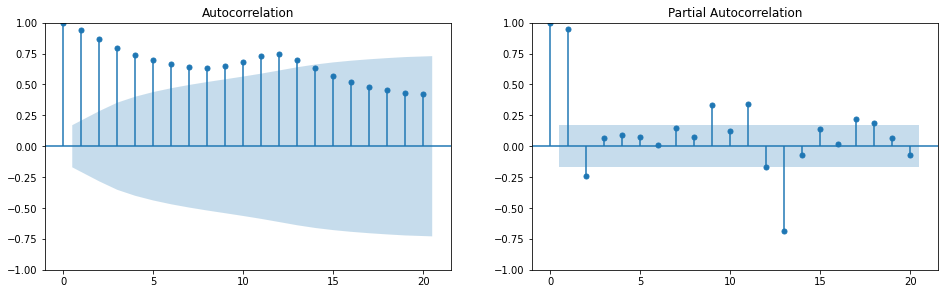

In [97]:
acf_pacf(train.target, 20)

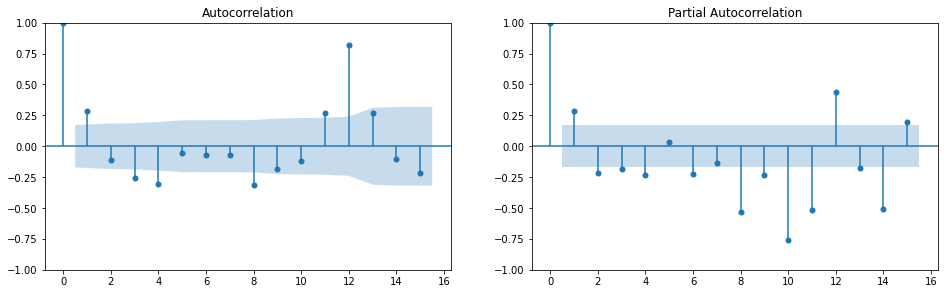

In [98]:
acf_pacf(train.target.diff().dropna(), 15)

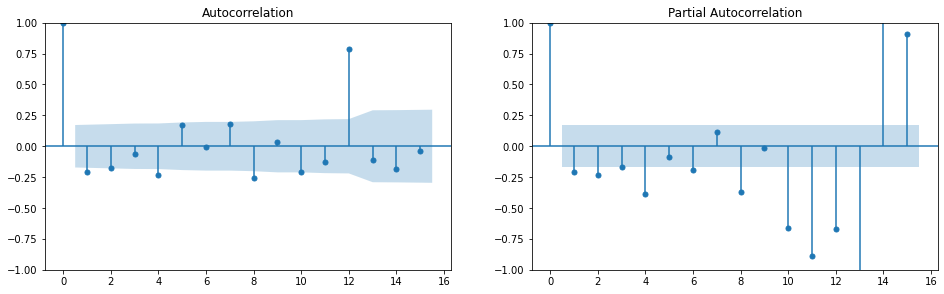

In [99]:
acf_pacf(train.target.diff().diff().dropna(), 15)

In [100]:
arima_d = 1

**Escolha do parâmetro (p)**: O valor de p (que corresponde ao grau de polinômios do componente AR) pode ser selecionado através da função de autocorrelação parcial, sendo p = número de lags correlacionados.


In [101]:
arima_p = 3

**Escolha do parâmetro (q)**: O valor de q (que corresponde ao grau de polinômios do componente MA) pode ser selecionado através da função de autocorrelação, sendo q = número de lags correlacionados.


In [102]:
arima_q = 4

**Obs.**: Geralmente, na prática a maioria das séries estacionárias apresentam  p + q ≤ 2. Porém não é uma regra.  

#### (2.1) Estimação:
Nessa etapa os valores dos parâmetros são estimados.

In [103]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train.target, order=(arima_p, arima_d, arima_q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 target   No. Observations:                  132
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -603.430
Date:                Sat, 03 Sep 2022   AIC                           1222.859
Time:                        06:51:56   BIC                           1245.861
Sample:                             0   HQIC                          1232.206
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1879      0.138     -1.361      0.174      -0.459       0.083
ar.L2         -0.2552      0.112     -2.269      0.023      -0.476      -0.035
ar.L3          0.1216      0.119      1.021      0.3

#### (2.2) Avaliação/Diagnóstico:
Essa etapa consiste em avaliar se o modelo estimado para a série está representando adequadamente o comportamento da série. 
* **Princípio da parcimônia**: entre 2 modelos que representam bem a série, é selecionado o modelo que tem o menor número de parâmetros;
* **Análise de Resíduos**model_fit: Se o modelo estiver representando bem a série temporal, os resíduos devem ser um ruído branco.

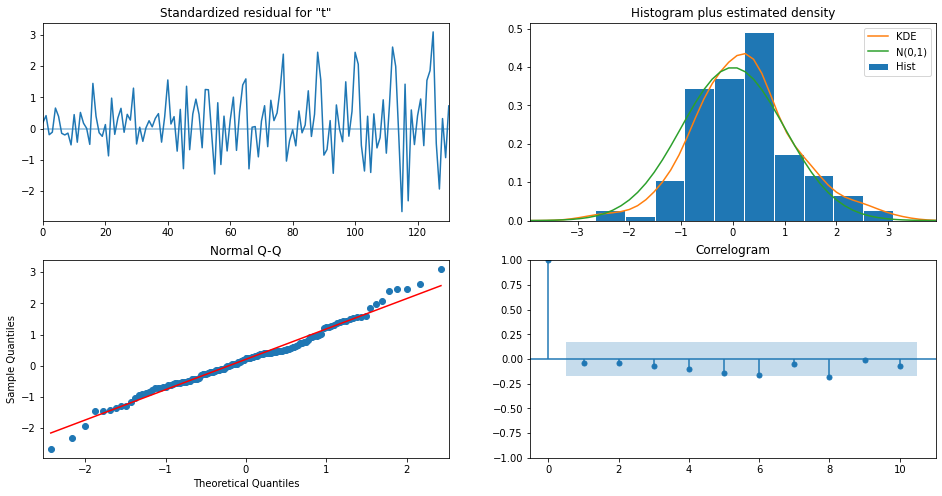

In [104]:
model_fit.plot_diagnostics(figsize=(16,8));

#### (3) Previsão:

Etapa em que é utilizado o modelo estimado para a previsão de séries temporais $h$ passos à frente.

In [105]:
test

,time,target
132,1960-01,417
133,1960-02,391
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461


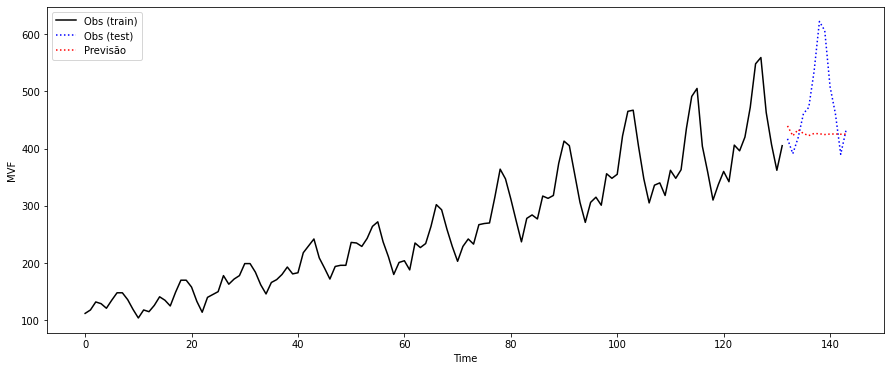

In [106]:
previsao = model_fit.predict(start=132, end=143)

obs_train = plt.plot(train.target, color='black', label='Obs (train)')
obs_test = plt.plot(test.target, color='blue', label= 'Obs (test)', linestyle='dotted')#, 'bo') 
pred = plt.plot(previsao, color='red', label='Previsão', linestyle='dotted')#, 'bo') 

plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("MVF")
plt.show()
# previsao

,pred,obs
132,439.503518,417
133,422.206633,391
134,433.095099,419
135,426.225977,461
136,422.635169,472
137,426.386799,535
138,425.763038,622
139,424.486263,606
140,425.341501,508
141,425.430785,461


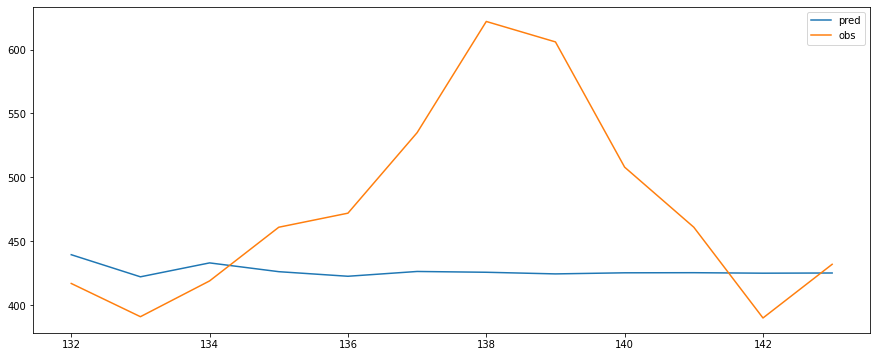

In [109]:
pred = model_fit.predict(start=len(train), end=len(test+train)-1)
obs = test.target

pred_df = pd.DataFrame()
pred_df['pred'] = pred
pred_df['obs'] = obs

pred_df.plot()
pred_df

**Exercício 03:**

Utiliza a realização da metodologia Box-Jenkins para previsão da série temporal de CO2 (disponível no statsmodels).